# Problem Statement:

# Predict Loan Eligibility for Dream Housing Finance company
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

# Information about the datasets used:

# Train file: 
CSV containing the customers for whom loan eligibility is known as 'Loan_Status'

Loan_ID:	Unique Loan ID

Gender:	Male/ Female

Married	Applicant: married (Y/N)

Dependents:	Number of dependents

Education:	Applicant Education (Graduate/ Under Graduate)

Self_Employed:	Self employed (Y/N)

ApplicantIncome:	Applicant income

CoapplicantIncome:	Coapplicant income

LoanAmount:	Loan amount in thousands

Loan_Amount_Term:	Term of loan in months

Credit_History:	credit history meets guidelines

Property_Area:	Urban/ Semi Urban/ Rural

Loan_Status	(Target): Loan approved (Y/N)


# Test file:
CSV containing the customer information for whom loan eligibility is to be predicted

Loan_ID:	Unique Loan ID

Gender:	Male/ Female

Married	Applicant: married (Y/N)

Dependents:	Number of dependents

Education:	Applicant Education (Graduate/ Under Graduate)

Self_Employed:	Self employed (Y/N)

ApplicantIncome:	Applicant income

CoapplicantIncome:	Coapplicant income

LoanAmount:	Loan amount in thousands

Loan_Amount_Term:	Term of loan in months

Credit_History:	credit history meets guidelines

Property_Area:	Urban/ Semi Urban/ Rural

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
train= pd.read_csv('train_ctrUa4K.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test= pd.read_csv('test_lAUu6dG.csv')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [7]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


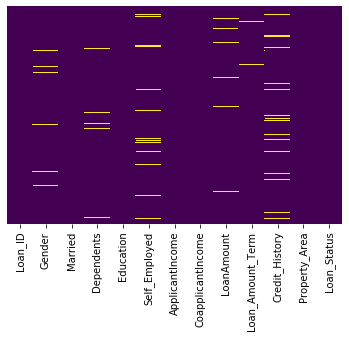

In [9]:
sns.heatmap(train.isnull(), cbar=False, cmap='viridis', yticklabels=False)

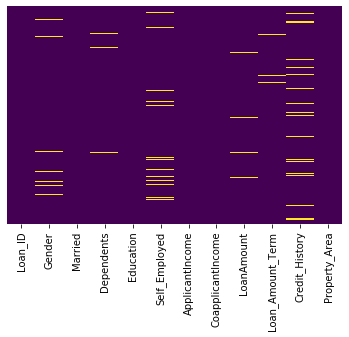

In [10]:
sns.heatmap(test.isnull(), cbar=False, cmap='viridis', yticklabels=False)

# Data Preprocessing

In [11]:
train['LoanAmount']=train['LoanAmount'].fillna(train['LoanAmount'].mean())
train['Loan_Amount_Term']=train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mean())
train['Credit_History']= train['Credit_History'].fillna(2.0)

In [12]:
test['LoanAmount']=test['LoanAmount'].fillna(test['LoanAmount'].mean())
test['Loan_Amount_Term']=test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mean())
test['Credit_History']= test['Credit_History'].fillna(2.0)

In [13]:
## Treating categorical features. Changing them to numerical data
##--------------------------------Training data------------------------------------------------

train['Gender']= pd.get_dummies(train['Gender'],drop_first=True)
train['Education']= pd.get_dummies(train['Education'],drop_first=True)
train['Self_Employed']= pd.get_dummies(train['Self_Employed'],drop_first=True)
train['Married']= pd.get_dummies(train['Married'],drop_first=True)
train['Property_Area']= pd.get_dummies(train['Property_Area'],drop_first=True)
train['Loan_Status']= pd.get_dummies(train['Loan_Status'],drop_first=True)

In [14]:
##--------------------------------Testing data------------------------------------------

test['Gender']= pd.get_dummies(test['Gender'],drop_first=True)
test['Education']= pd.get_dummies(test['Education'],drop_first=True)
test['Self_Employed']= pd.get_dummies(test['Self_Employed'],drop_first=True)
test['Married']= pd.get_dummies(test['Married'],drop_first=True)
test['Property_Area']= pd.get_dummies(test['Property_Area'],drop_first=True)

In [15]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,0,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,0,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,0,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,0,1


In [16]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,0
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,0
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,0
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,2.0,0
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,0


In [17]:
train['Dependents']= train['Dependents'].fillna('4')
train['Dependents']=train['Dependents'].replace('3+','3')
train['Dependents']=train['Dependents'].astype('int')

In [18]:
test['Dependents']= test['Dependents'].fillna('4')
test['Dependents']=test['Dependents'].replace('3+','3')
test['Dependents']=test['Dependents'].astype('int')

In [19]:
train.drop(['Loan_ID'], axis=1, inplace=True)

In [20]:
loan= test[['Loan_ID']]
test.drop(['Loan_ID'], axis=1, inplace=True)

# Exploritory Data Analysis

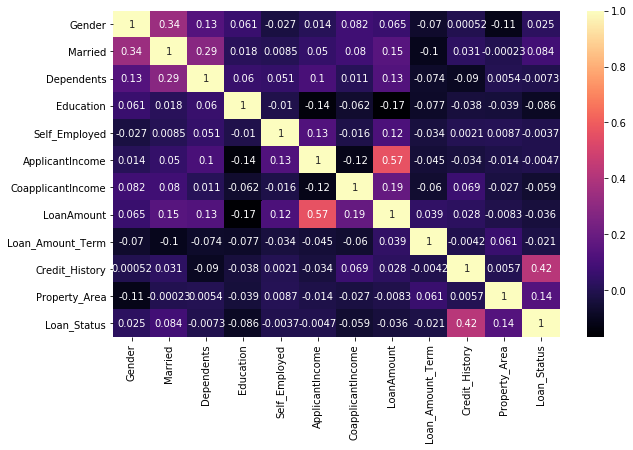

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(train.corr(), cmap='magma', annot= True)

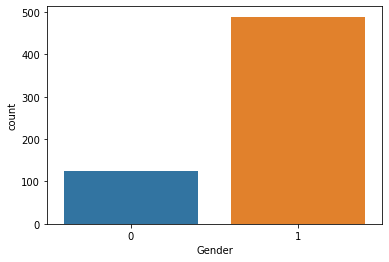

In [22]:
sns.countplot(train['Gender'])

In [23]:
# This shows that there are lots of 'Male' present in the given dataset.

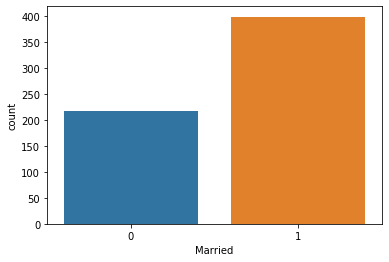

In [24]:
sns.countplot(train['Married'])

In [25]:
# This shows that majority of the people in the given dataset are married.

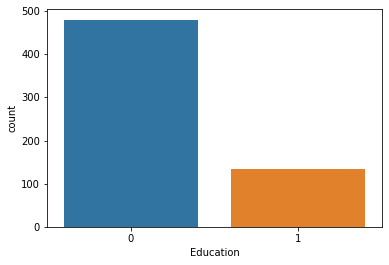

In [26]:
sns.countplot(train['Education'])

In [27]:
# This shows that majority people are graduates.

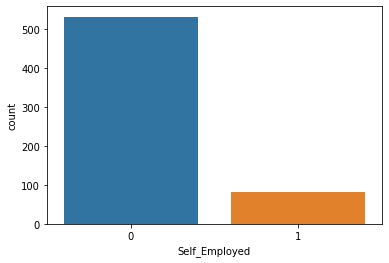

In [28]:
sns.countplot(train['Self_Employed'])

In [29]:
# This shows that the majority people are not self-employeed.

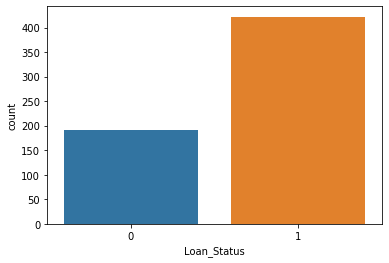

In [30]:
sns.countplot(train['Loan_Status'])

In [31]:
# We find here that the dataset is highly imbalanced. So let's balance that!

In [32]:
from sklearn.utils import resample

# Finding the majority and minority classifications in the target variable.
train_majority= train[train['Loan_Status']==1]
train_minority= train[train['Loan_Status']==0]

# Resampling the dataset to increase the minority equal to the majority.
train_minority_upsampled= resample(train_minority, replace=True,n_samples= len(train_majority), random_state=42)

In [33]:
train_minority_upsampled

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
328,0,1,0,0,0,4333,2451.0,110.0,360.0,1.0,0,0
574,1,1,3,0,0,6406,0.0,150.0,360.0,1.0,1,0
293,0,0,4,0,0,5417,0.0,143.0,480.0,0.0,0,0
34,1,0,3,0,0,12500,3000.0,320.0,360.0,1.0,0,0
346,1,1,4,1,0,3523,3230.0,152.0,360.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
153,1,1,2,1,0,2281,0.0,113.0,360.0,1.0,0,0
489,1,0,0,0,0,2435,0.0,75.0,360.0,1.0,0,0
589,1,1,2,0,1,2726,0.0,106.0,360.0,0.0,1,0
186,1,1,1,0,1,2178,0.0,66.0,300.0,0.0,0,0


In [34]:
train_upsampled= pd.concat([train_majority,train_minority_upsampled])
train_upsampled

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,0,1
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,0,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,0,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,0,1
5,1,1,2,0,1,5417,4196.0,267.000000,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
153,1,1,2,1,0,2281,0.0,113.000000,360.0,1.0,0,0
489,1,0,0,0,0,2435,0.0,75.000000,360.0,1.0,0,0
589,1,1,2,0,1,2726,0.0,106.000000,360.0,0.0,1,0
186,1,1,1,0,1,2178,0.0,66.000000,300.0,0.0,0,0


In [35]:
train_upsampled['Loan_Status'].value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

In [36]:
# Here we can see that the class is balanced. This will not lead to any kind of bias in the model prediction!!

# Model Building:
1. Random Forest 

In [67]:
x= train_upsampled.drop('Loan_Status', axis=1)
y= train_upsampled['Loan_Status']

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfor= RandomForestClassifier(random_state=42, n_estimators=200,criterion='entropy', max_depth=10)

In [39]:
rfor.fit(x,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [40]:
yp1=rfor.predict(test)
df_yp1= pd.DataFrame(yp1, columns=['Loan_Status'])
df_yp1.head()

,Loan_Status
0,1
1,1
2,1
3,1
4,0


In [41]:
loan_1= {0:'N',1:'Y'}
df_yp1['Loan_Status']=df_yp1['Loan_Status'].astype('object')

In [42]:
df_yp1['Loan_Status']= df_yp1['Loan_Status'].map(loan_1)
df_yp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Loan_Status  367 non-null    object
dtypes: object(1)
memory usage: 3.0+ KB


In [43]:
#df_yp1
prediction= pd.DataFrame({'Loan_ID':loan['Loan_ID'],'Loan_Status':df_yp1['Loan_Status']})
prediction.to_csv('Submission1.csv',index=False)

In [44]:
df= pd.read_csv('Submission1.csv')
df.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N


2. SVM

In [45]:
from sklearn.svm import SVC
model = SVC() 
model.fit(x,y) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [46]:
yp2= model.predict(test)

In [47]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.01,0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(x,y) 

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.497, total=   0.1s
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.497, total=   0.1s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.497, total=   0.1s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.497, total=   0.1s

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s



[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.607, total=   0.1s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=0.01, gamma=0.1, kernel=rbf, score=0.497, total=   0.1s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=0.01, gamma=0.1, kernel=rbf, score=0.497, total=   0.1s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=0.01, gamma=0.1, kernel=rbf, score=0.497, total=   0.1s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=0.01, gamma=0.1, kernel=rbf, score=0.497, total=   0.1s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=0.01, gamma=0.1, kernel=rbf, score=0.607, total=   0.1s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=0.01, gamma=0.01, kernel=rbf, score=0.497, total=   0.1s
[CV] 

[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.870, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.817, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.870, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.822, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.851, total=   0.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.935, total=   0.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.911, total=   0.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   13.5s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [48]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [49]:
grid_predictions = grid.predict(test) 

In [50]:
df_yp2= pd.DataFrame(grid_predictions, columns=['Loan_Status'])
df_yp2.head()

,Loan_Status
0,1
1,1
2,1
3,1
4,1


In [51]:
#loan_1= {0:'N',1:'Y'}
df_yp2['Loan_Status']=df_yp2['Loan_Status'].astype('object')

df_yp2['Loan_Status']= df_yp2['Loan_Status'].map(loan_1)
df_yp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Loan_Status  367 non-null    object
dtypes: object(1)
memory usage: 3.0+ KB


In [52]:
prediction= pd.DataFrame({'Loan_ID':loan['Loan_ID'],'Loan_Status':df_yp2['Loan_Status']})
prediction.to_csv('Submission2.csv',index=False)

In [53]:
df= pd.read_csv('Submission2.csv')
df.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


3. XGBoost Classifier

In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# define model
model = XGBClassifier()
# define grid
weights = [1, 10,15,20, 25, 50, 75, 99, 100, 1000]
param_grid = dict(scale_pos_weight=weights)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=12, n_repeats=3, random_state=42)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
# execute the grid search
grid_result = grid.fit(x, y)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.895768 using {'scale_pos_weight': 1}
0.895768 (0.035153) with: {'scale_pos_weight': 1}
0.885670 (0.039021) with: {'scale_pos_weight': 10}
0.880736 (0.040197) with: {'scale_pos_weight': 15}
0.880693 (0.040203) with: {'scale_pos_weight': 20}
0.878348 (0.042120) with: {'scale_pos_weight': 25}
0.871178 (0.044510) with: {'scale_pos_weight': 50}
0.867527 (0.044186) with: {'scale_pos_weight': 75}
0.867086 (0.044417) with: {'scale_pos_weight': 99}
0.867416 (0.047616) with: {'scale_pos_weight': 100}
0.854711 (0.047685) with: {'scale_pos_weight': 1000}


In [63]:
yp3=grid.predict(test)

In [64]:
df_yp3= pd.DataFrame(yp3, columns=['Loan_Status'])
df_yp3['Loan_Status']=df_yp3['Loan_Status'].astype('object')

df_yp3['Loan_Status']= df_yp3['Loan_Status'].map(loan_1)

prediction= pd.DataFrame({'Loan_ID':loan['Loan_ID'],'Loan_Status':df_yp3['Loan_Status']})
prediction.to_csv('Submission3.csv',index=False)

df= pd.read_csv('Submission3.csv')
df.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N


4. ExtraForest Classifier

In [68]:
from sklearn.ensemble import ExtraTreesClassifier
efor= ExtraTreesClassifier(n_estimators=500, random_state=27, criterion='gini', min_samples_leaf=5, verbose=3)
efor.fit(x,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
b

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.4s finished


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=5, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=500,
                     n_jobs=None, oob_score=False, random_state=27, verbose=3,
                     warm_start=False)

In [69]:
yp4=efor.predict(test)

df_yp4= pd.DataFrame(yp4, columns=['Loan_Status'])
df_yp4['Loan_Status']=df_yp4['Loan_Status'].astype('object')

df_yp4['Loan_Status']= df_yp4['Loan_Status'].map(loan_1)

prediction= pd.DataFrame({'Loan_ID':loan['Loan_ID'],'Loan_Status':df_yp4['Loan_Status']})
prediction.to_csv('Submission4.csv',index=False)

df= pd.read_csv('Submission4.csv')
df.head()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N


5. Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

lr= LogisticRegression(random_state=42, max_iter=200)
lr.fit(x,y)

#rr = Ridge(alpha=0.01)
#rr.fit(x, y) 
#y_rr= rr.predict(test)

#lasso = Lasso(alpha=0.01)
#lasso.fit(x, y) 
#y_lasso= lasso.predict(test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
yp5= lr.predict(test)

df_yp5= pd.DataFrame(yp5, columns=['Loan_Status'])
df_yp5['Loan_Status']=df_yp5['Loan_Status'].astype('object')

df_yp5['Loan_Status']= df_yp5['Loan_Status'].map(loan_1)

prediction= pd.DataFrame({'Loan_ID':loan['Loan_ID'],'Loan_Status':df_yp5['Loan_Status']})
prediction.to_csv('Submission5.csv',index=False)

df= pd.read_csv('Submission5.csv')
df.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N
